## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
import os, sys
sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))

/Users/Tony/Other Docs/distilling-and-forgetting-in-large-pre-trained-models


In [3]:
from pathlib import Path
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="ticks")

In [5]:
dirpath = Path("outputs/finetune_ewc/hpt/")
assert dirpath.is_dir()

In [6]:
sorted(list(dirpath.glob("*")))

[PosixPath('outputs/finetune_ewc/hpt/lambda_0.csv'),
 PosixPath('outputs/finetune_ewc/hpt/lambda_1e+0.csv'),
 PosixPath('outputs/finetune_ewc/hpt/lambda_1e+1.csv'),
 PosixPath('outputs/finetune_ewc/hpt/lambda_1e+2.csv'),
 PosixPath('outputs/finetune_ewc/hpt/lambda_1e-1.csv'),
 PosixPath('outputs/finetune_ewc/hpt/lambda_1e-2.csv'),
 PosixPath('outputs/finetune_ewc/hpt/lambda_inf.csv')]

In [7]:
list_df = [pd.read_csv(filepath).assign(lambda_ewc=filepath.stem) for filepath in dirpath.glob("*")]
df = pd.concat(list_df).reset_index(drop=True)
df["lambda_ewc"] = df["lambda_ewc"].str.extract(r'lambda_(.+)').astype(float)
df = df[df["lambda_ewc"]!= 0]  # drop rows where lambda = 0

In [8]:
df.set_index(["Dataset", "lambda_ewc"]).sort_index(level=0)

WER (%)  Sub (%)  Del (%)  Ins (%)
Dataset        lambda_ewc                                    
ami            0.01          40.19    17.67     9.07    13.44
               0.10          35.63    17.34     9.89     8.41
               1.00          33.88    16.93     9.79     7.16
               10.00         34.69    17.17     9.96     7.56
               100.00        34.60    17.02    10.09     7.49
               inf           34.67    17.12    10.04     7.51
librispeech_fr 0.01          33.32    24.10     2.46     6.76
               0.10          32.62    23.95     2.25     6.41
               1.00          31.79    23.94     2.41     5.44
               10.00         32.20    24.01     2.57     5.62
               100.00        32.19    24.03     2.56     5.61
               inf           32.75    23.99     2.56     6.20
librispeech_pt 0.01          29.60    21.39     2.82     5.40
               0.10          29.09    21.25     3.26     4.58
               1.00          28.47    20.62     3.38     4.47
               10.00         28.51    20.65     3.37     4.50
               100.00        28.48    20.62     3.35     4.52
               inf           28.51    20.66     3.37     4.49

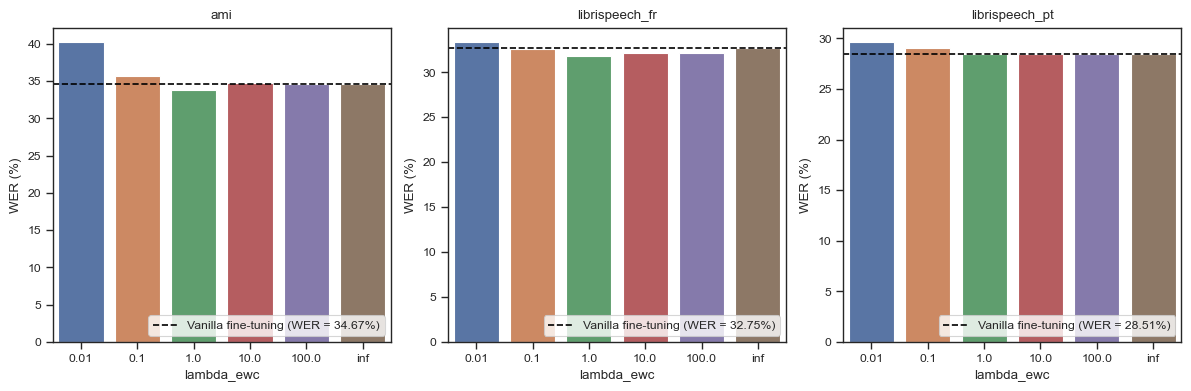

In [9]:
n_cols = df["Dataset"].nunique()
fig, axis = plt.subplots(1, n_cols, figsize=(4*n_cols, 4))

for dataset_name, ax in zip(df["Dataset"].unique(), axis.ravel()):
    df_curr = df.loc[df["Dataset"]==dataset_name]
    sns.barplot(data=df_curr, x="lambda_ewc", y="WER (%)", ax=ax)
    if float("inf") in df_curr["lambda_ewc"].unique():
        y_vanilla = df_curr.loc[df_curr["lambda_ewc"] == float("inf"), "WER (%)"].item()
        ax.axhline(y=y_vanilla, label=f"Vanilla fine-tuning (WER = {y_vanilla}%)", c="black", ls="--")
        ax.legend(loc="lower right")
    ax.set_title(dataset_name)

fig.tight_layout()

In [10]:
ser = df.set_index(["Dataset", "lambda_ewc"]).sort_index(level=0)["WER (%)"]
output = ser.to_latex(float_format="%.2f", escape=True)
    
print("```latex")
print(output + "```")

```latex
\begin{tabular}{llr}
\toprule
               &        &  WER (\%) \\
Dataset & lambda\_ewc &          \\
\midrule
ami & 0.01   &    40.19 \\
               & 0.10   &    35.63 \\
               & 1.00   &    33.88 \\
               & 10.00  &    34.69 \\
               & 100.00 &    34.60 \\
               & inf    &    34.67 \\
librispeech\_fr & 0.01   &    33.32 \\
               & 0.10   &    32.62 \\
               & 1.00   &    31.79 \\
               & 10.00  &    32.20 \\
               & 100.00 &    32.19 \\
               & inf    &    32.75 \\
librispeech\_pt & 0.01   &    29.60 \\
               & 0.10   &    29.09 \\
               & 1.00   &    28.47 \\
               & 10.00  &    28.51 \\
               & 100.00 &    28.48 \\
               & inf    &    28.51 \\
\bottomrule
\end{tabular}
```


/var/folders/n1/btw1cwhd13s0p6vyp4j839040000gn/T/ipykernel_33917/2593639905.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  output = ser.to_latex(float_format="%.2f", escape=True)
